<a href="https://colab.research.google.com/github/marioalejandrohernandez/MODELOS-DE-REGRESION-NO-LINEAL/blob/main/Actividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresion Lineal Multiple**

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cuentas_credicel.csv", encoding='ISO-8859-1')

df

<ipython-input-48-618b7efd9f55>:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cuentas_credicel.csv", encoding='ISO-8859-1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,8.87,10000,0,97880,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,29.49,5000,0,37295,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,23.76,4750,0,20210,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,28.56,7000,0,78434,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


**Nulos**

In [49]:
for columna in df.columns:
    if df[columna].dtype == 'object':
        # Si la columna es categórica, imputamos con la moda
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
    else:
        # Si la columna es numérica, imputamos con la mediana
        mediana = df[columna].median()
        df[columna].fillna(mediana, inplace=True)
df.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [50]:
df.columns

Index(['folio', 'tag', 'folio_solicitud', 'fecha', 'marca', 'modelo', 'plazo',
       'precio', 'enganche', 'descuento', 'semana', 'monto_financiado',
       'costo_total', 'monto_accesorios', 'agente_venta', 'dis_venta',
       'status', 'fraude', 'empresa', 'inversion', 'pagos_realizados',
       'reautorizacion', 'fecha_ultimo_pago', 'fecha_pago_proximo',
       'status_cuenta', 'puntos', 'riesgo', 'score_buro', 'razones_buro',
       'porc_eng', 'limite_credito', 'semana_actual', 'cp_cliente',
       'edad_cliente', 'cd_cliente', 'edo_cliente', 'cd_venta', 'edo_venta',
       'curp'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [52]:
columnns = list(df.columns)

# Ciclo for para encontrar outliers
for columna in df.columns:
    if df[columna].dtypes == 'int64' or df[columna].dtypes == 'float64':
        # Calcular cuartiles para identificar outliers en cada columna
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)

        # Calcular el IQR
        IQR = Q3 - Q1

        # Definir los límites para outliers
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        # Máscara booleana para identificar outliers
        outlier_mask = (df[columna] < lim_inf) | (df[columna] > lim_sup)

        # Reemplazar outliers por la mediana
        median = df[columna].median()
        df.loc[outlier_mask, columna] = median




In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [54]:
df = df.dropna(axis=1)
#No me corrio la matriz de dispersiones pero

 y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

#**------------------Modelo No Lineal Riesgo---------------**

##**1: Riesgo Precio**

In [55]:
Vars_Indep= df[['monto_financiado']]
Var_Dep= df['precio']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a , b):
     return a*np.tan(x) + b

parametros, covs= curve_fit(func1, df['monto_financiado'], df['precio'])



parametros, _ = curve_fit(func1, df['monto_financiado'], df['precio'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b
yfit1 = (a*x**10 + b)/x

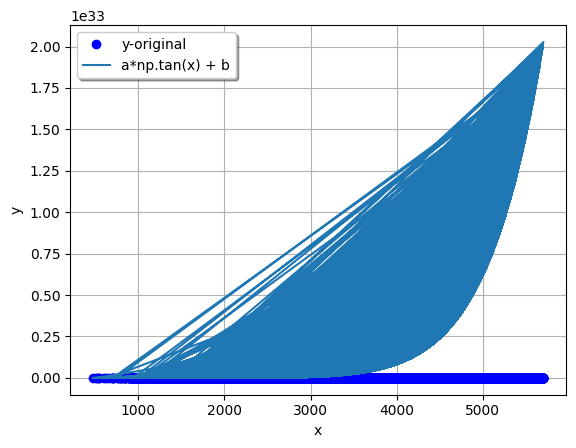

In [56]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [57]:
R2_1 = r2_score(y, yfit1)
R2_1

-4.4498705940232514e+58

In [58]:
corr= np.sqrt(abs(R2_1))
corr

2.1094716385918184e+29

##**2:Riesgo /porc_eng**

In [59]:
Vars_Indep= df[['puntos']]
Var_Dep= df['precio']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a , b):
     return a*np.tan(x) + b

parametros, covs= curve_fit(func1, df['puntos'], df['riesgo'])



parametros, _ = curve_fit(func1, df['puntos'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b
yfit1 = (a*x**10 + b)/x


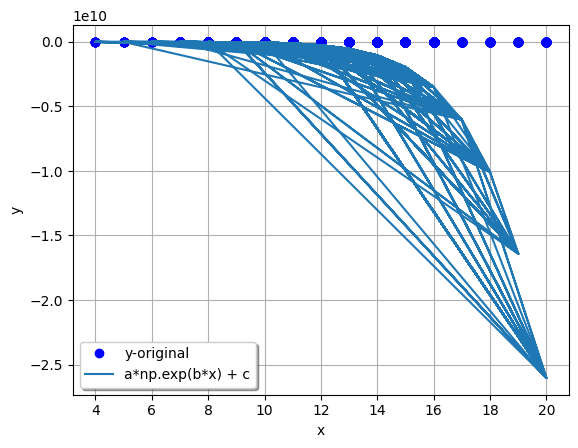

In [60]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.exp(b*x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [61]:
R2_1 = r2_score(y, yfit1)
R2_1

R2_1 = r2_score(y, yfit1)
R2_1

-1960641424960.3777

In [62]:
corr= np.sqrt(abs(R2_1))
corr

1400229.0616039855

##**3:Riesgo /pedad_cliente**

In [63]:
Vars_Indep= df[['edad_cliente']]
Var_Dep= df['riesgo']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a , b):
     return a*np.log(x) + b

parametros, covs= curve_fit(func1, df['edad_cliente'], df['riesgo'])



parametros, _ = curve_fit(func1, df['edad_cliente'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

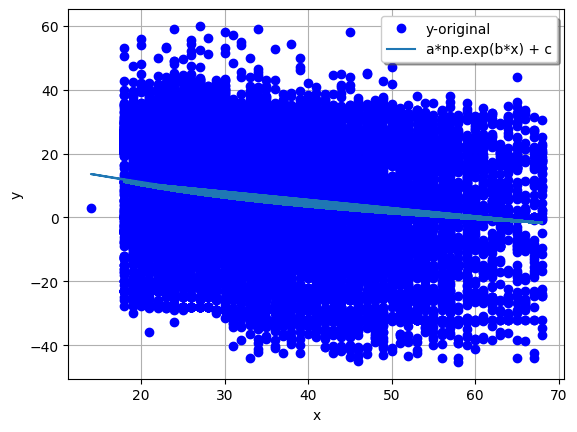

In [64]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.exp(b*x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [65]:
R2_1 = r2_score(y, yfit1)
R2_1



0.03308170876189953

In [66]:
corr= np.sqrt(abs(R2_1))
corr

0.18188377817139034

##**4:Riesgo /semana_actual**

In [67]:
Vars_Indep= df[['semana_actual']]
Var_Dep= df['riesgo']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a , b):
     return a*np.tan(x) + b

parametros, covs= curve_fit(func1, df['semana_actual'], df['riesgo'])



parametros, _ = curve_fit(func1, df['semana_actual'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

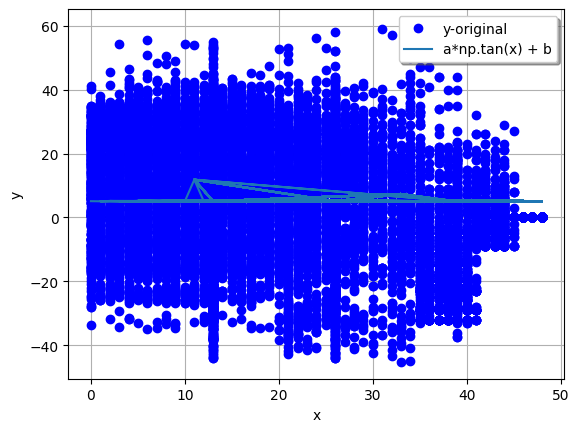

In [68]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [69]:
R2_1 = r2_score(y, yfit1)
R2_1


0.0035391895615660696

In [70]:
corr= np.sqrt(abs(R2_1))
corr

0.059491088085242394

##**Riesgo /folio**

In [71]:
Vars_Indep= df[['folio_solicitud']]
Var_Dep= df['riesgo']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a , b):
     return a*np.log(x) + b

parametros, covs= curve_fit(func1, df['folio_solicitud'], df['riesgo'])



parametros, _ = curve_fit(func1, df['folio_solicitud'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

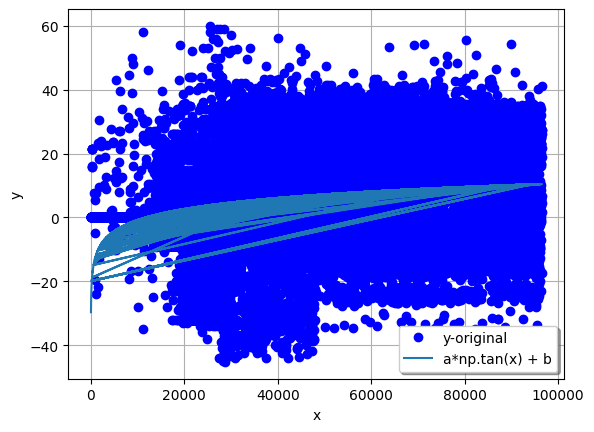

In [72]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [73]:
R2_1 = r2_score(y, yfit1)
R2_1

0.07712961118409689

In [74]:
corr= np.sqrt(abs(R2_1))
corr

0.277722183456952

#**----------------Modelo No lineal Score Buro---------------------**

##**6:Riesgo/ScoreBuro**

In [75]:
Vars_Indep= df[['puntos']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return  a*np.log(x) + b

parametros, covs = curve_fit(func1, df['score_buro'], df['puntos'])



parametros, _ = curve_fit(func1, df['score_buro'], df['puntos'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*np.log(x) + b


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


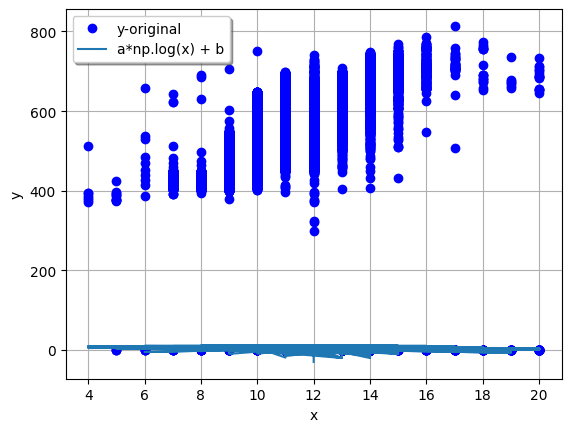

In [76]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [77]:
R2_2 = r2_score(y, yfit2)
R2_2

-1.0176454307109606

In [78]:
corr2= np.sqrt(abs(R2_2))
corr2

1.0087841348430102

##**7:Score Buro**

In [79]:
Vars_Indep= df[['porc_eng']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c/x

parametros, covs = curve_fit(func1, df['score_buro'], df['porc_eng'])



parametros, _ = curve_fit(func1, df['score_buro'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a/b*x**2 + c/x

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


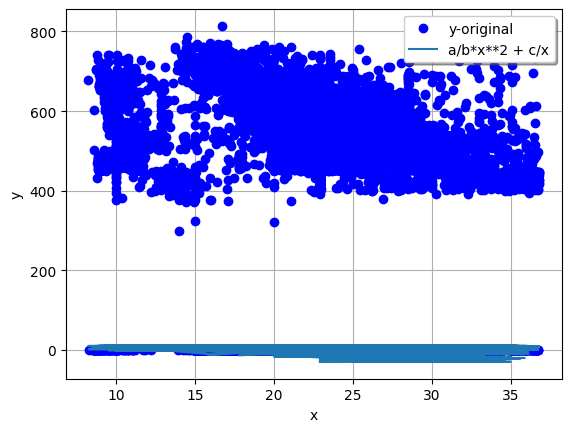

In [80]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c/x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [81]:
R2_2 = r2_score(y, yfit2)
R2_2

-1.374618330790692

In [82]:
corr2= np.sqrt(abs(R2_2))
corr2

1.1724411843630758

##**8:Score Buro**

In [83]:
Vars_Indep= df[['precio']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c/x

parametros, covs = curve_fit(func1, df['score_buro'], df['precio'])



parametros, _ = curve_fit(func1, df['score_buro'], df['precio'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a/b*x**2 + c/x

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


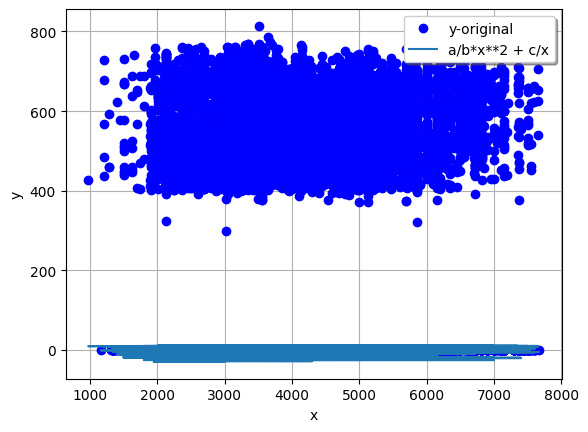

In [84]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c/x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [85]:
R2_2 = r2_score(y, yfit2)
R2_2

-5069936243.385604

In [86]:
corr2= np.sqrt(abs(R2_2))
corr2

71203.48476995774

##**9:Score Buro/FOLIO**

In [87]:
Vars_Indep= df[['folio']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2

parametros, covs = curve_fit(func1, df['score_buro'], df['folio'])



parametros, _ = curve_fit(func1, df['score_buro'], df['folio'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a/b*x**2

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


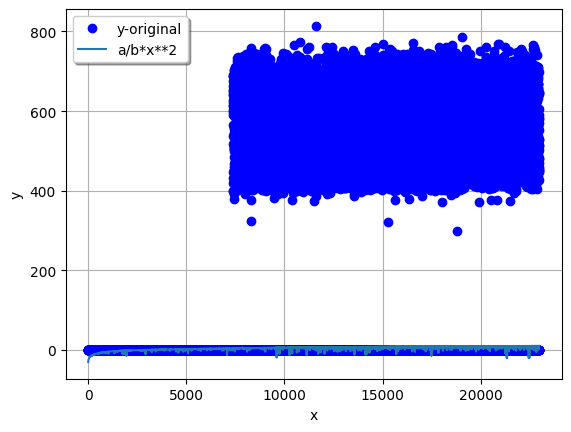

In [88]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [89]:
R2_2 = r2_score(y, yfit2)
R2_2

-1312874163.869872

In [90]:
corr2= np.sqrt(abs(R2_2))
corr2

36233.605449497736

##**10:ScoreBuro/folio_solicitud**

In [91]:
Vars_Indep= df[['folio_solicitud']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

parametros, covs = curve_fit(func1, df['score_buro'], df['folio_solicitud'])



parametros, _ = curve_fit(func1, df['score_buro'], df['folio_solicitud'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*np.abs(x) + b*x + c

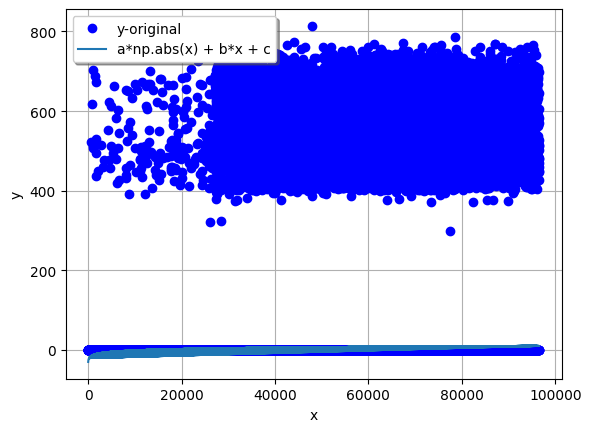

In [92]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [93]:
R2_1 = r2_score(y, yfit1)
R2_1


-0.9870693252631004

In [94]:
corr2= np.sqrt(abs(R2_2))
corr

0.277722183456952

#**----------------------------Modelo 3 porc_eng----------------------------**

##**11:Porc_eng/precio**

In [95]:
Vars_Indep= df[['precio']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

parametros, covs = curve_fit(func1, df['porc_eng'], df['precio'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['precio'])
a = parametros[ 0 ]
yfit2 = 1/a*x

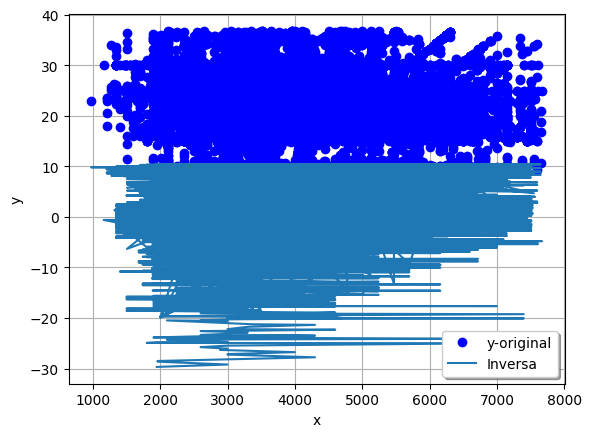

In [96]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="Inversa")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [97]:
R2_3 = r2_score(y, yfit2)
R2_3

-17114515210.332455

In [98]:
corr3= np.sqrt(abs(R2_3))
corr3

130822.45682730644

##**12: Riesgo /porc_eng**

In [99]:
Vars_Indep= df[['riesgo']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b,c):
     return 1/a*x + c**b

parametros, covs = curve_fit(func1, df['porc_eng'], df['precio'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['precio'])
a,b,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = 1/a*x +c**b
yfit2

,riesgo
0,3930.201698
1,3930.201698
2,3930.201698
3,3930.201698
4,3930.201698
...,...
22730,3930.205538
22731,3930.204361
22732,3930.205433
22733,3930.199267


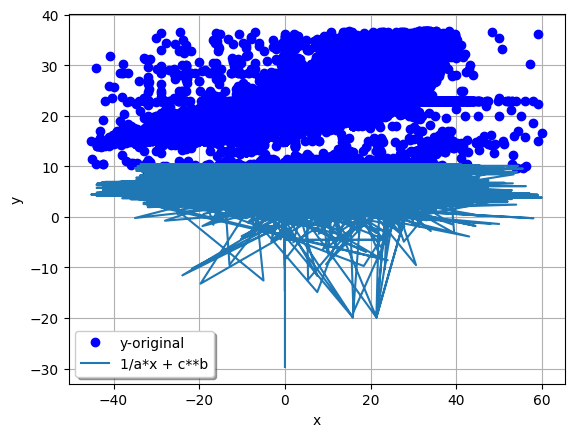

In [100]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x + c**b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [101]:
R2_3 = r2_score(y, yfit2)
R2_3

-555379.0198949422

In [102]:
corr3= np.sqrt(abs(R2_3))
corr3

745.2375593694551

##**13: Porc_eng Foolio solicitud**

In [103]:
Vars_Indep= df[['folio_solicitud']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return a*np.log(x)

parametros, covs = curve_fit(func1, df['porc_eng'], df['folio_solicitud'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['folio_solicitud'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit2 = a*np.log(x) + b

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


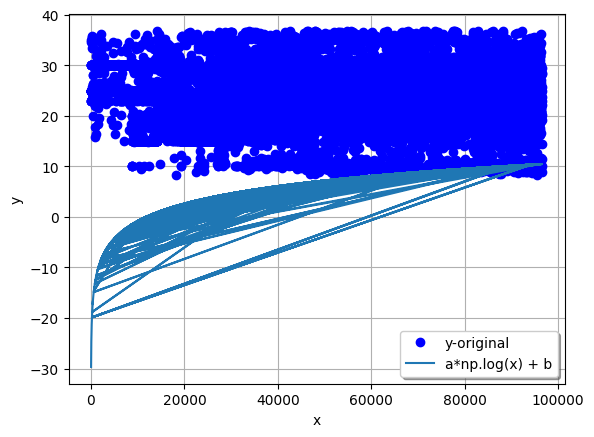

In [104]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [105]:
R2_3 = r2_score(y, yfit2)
R2_3

-882135214.2760973

In [106]:
corr3= np.sqrt(abs(R2_3))
corr3

29700.761173345327

##**14: Porc_eng Puntos**

In [113]:
Vars_Indep= df[['puntos']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return b*np.log(x)+b

parametros, covs = curve_fit(func1, df['porc_eng'], df['puntos'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['puntos'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit2 = b*np.log(x) + b

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


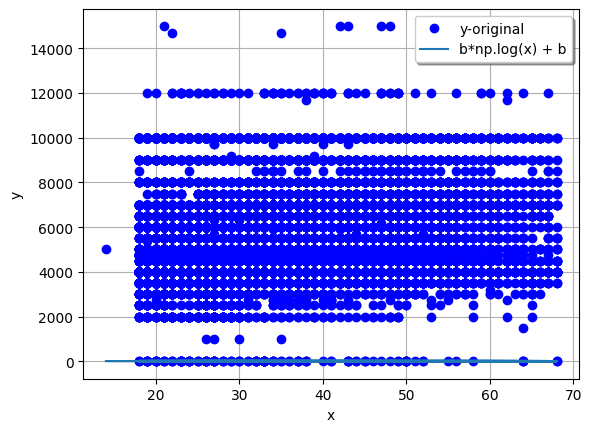

In [116]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="b*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [117]:
R2_2 = r2_score(y, yfit1)
R2_2

-7.666435321201462

In [118]:
corr2= np.sqrt(abs(R2_2))
corr2

2.768832844575754

##**14:Porc_eng enganche**

In [121]:
Vars_Indep= df[['enganche']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b,c):
     return a*np.abs(x) + b*x + c

parametros, covs = curve_fit(func1, df['porc_eng'], df['enganche'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['enganche'])
a, b,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*np.abs(x) + b*x + c

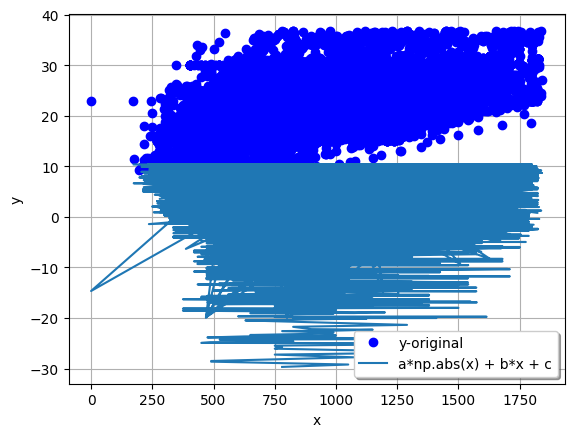

In [122]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [123]:
R2_3 = r2_score(y, yfit2)
R2_3

-27767472.430987954

In [124]:
corr3= np.sqrt(abs(R2_3))
corr3

5269.4850252171655

##**Modelo 15**

In [128]:
Vars_Indep= df[['puntos']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b,c):
     return a*x**2 + b*x + c

parametros, covs = curve_fit(func1, df['porc_eng'], df['puntos'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['puntos'])
a, b,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*x**2 + b*x + c

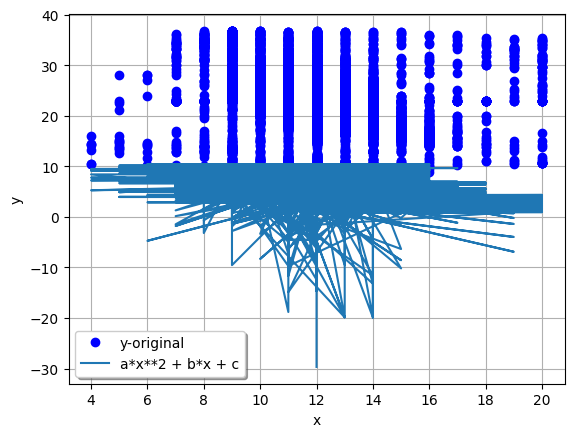

In [130]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [131]:
R2_3 = r2_score(y, yfit2)
R2_3

-3.5246810220306743

##**Modelo limite_crédito**

In [114]:
df_filtrado = df[df['limite_credito'] == 'SD']
df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
promedio_limite_credito = df['limite_credito'].mean()
df['limite_credito'].fillna(promedio_limite_credito, inplace=True)

Vars_Indep= df[['edad_cliente']]
Var_Dep= df['limite_credito']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

parametros, covs = curve_fit(func1, df['limite_credito'], df['edad_cliente'])



parametros, _ = curve_fit(func1, df['limite_credito'], df['edad_cliente'])
a = parametros[ 0 ]
yfit3 = 1/a*x


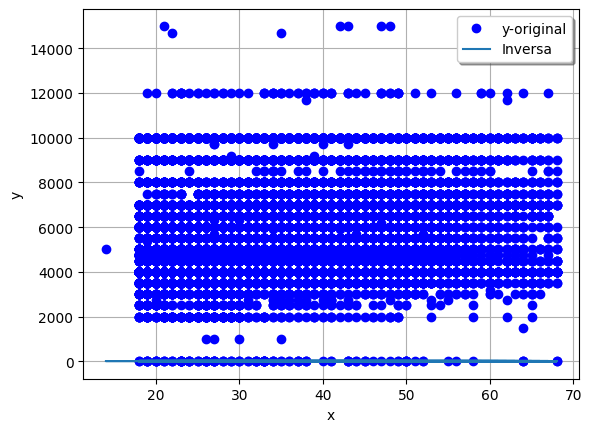

In [108]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="Inversa")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [110]:
corr3= np.sqrt(abs(R2_3))
corr3

70.17972020609473

In [132]:
corr3= np.sqrt(abs(R2_3))
corr3

1.8774133860262834

##**Modelo limite_crédito**

In [139]:
Vars_Indep= df[['score_buro']]
Var_Dep= df['limite_credito']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b,c):
     return a*np.abs(x) + b*x + c

parametros, covs = curve_fit(func1, df['limite_credito'], df['score_buro'])



parametros, _ = curve_fit(func1, df['limite_credito'], df['score_buro'])
a, b,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*np.abs(x) + b*x + c

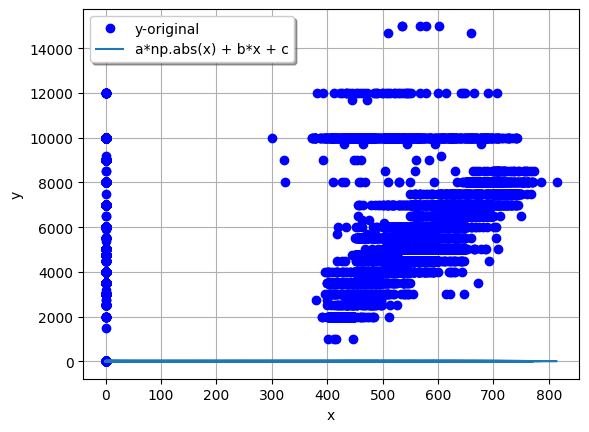

In [140]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [142]:
R2_3 = r2_score(y, yfit2)
R2_3

-6.666391034615676

In [143]:
corr3= np.sqrt(abs(R2_3))
corr3

2.581935521002737

##**18**

In [145]:
Vars_Indep= df[['edad_cliente']]
Var_Dep= df['limite_credito']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b):
     return a*np.log(x) + b

parametros, covs = curve_fit(func1, df['limite_credito'], df['score_buro'])



parametros, _ = curve_fit(func1, df['limite_credito'], df['score_buro'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit2 = a*np.log(x) + b

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


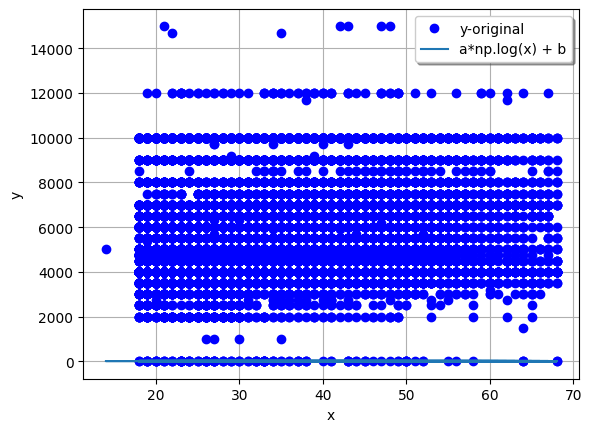

In [147]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [148]:
R2_3 = r2_score(y, yfit2)
R2_3

-7.666950139580841

In [149]:
corr3= np.sqrt(abs(R2_3))
corr3

2.768925809692423

##**19**

In [150]:
Vars_Indep= df[['puntos']]
Var_Dep= df['limite_credito']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b,c):
     return a*x**2 + b*x + c

parametros, covs = curve_fit(func1, df['limite_credito'], df['puntos'])



parametros, _ = curve_fit(func1, df['limite_credito'], df['puntos'])
a, b,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a*x**2 + b*x + c

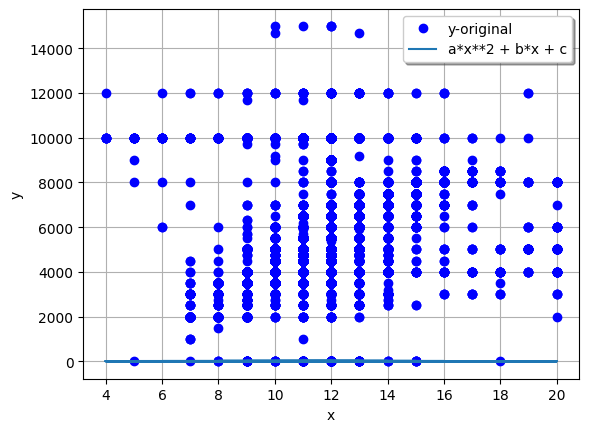

In [151]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [152]:
R2_3 = r2_score(y, yfit2)
R2_3

-7.6586404841357165

In [153]:
corr3= np.sqrt(abs(R2_3))
corr3

2.7674248831966004

**Tablas3**

In [155]:
modelos = ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4","Modelo 5","Modelo 6","Modelo 7", "Modelo 8","Modelo9","Modelo 10", "Modelo 11","Modelo 12","Modelo 13","Modelo 14","Modelo 15","Modelo 16","Modelo 17","Modelo 18","Modelo 19"]
coeficientes = [0.58,-198920,0.033,0.0335,0.077,-1.01,-1.37,-5000000,-1312231342,-0.98,-1308222,-55379,-88142322,-7.644,-27272312,-3.52,70,-6.66,7.65]
data = {'Modelo': modelos, 'Coeficiente de Determinación': coeficientes}
tabla = pd.DataFrame(data)
tabla

,Modelo,Coeficiente de Determinación
0,Modelo 1,5.800000e-01
1,Modelo 2,-1.989200e+05
2,Modelo 3,3.300000e-02
3,Modelo 4,3.350000e-02
4,Modelo 5,7.700000e-02
5,Modelo 6,-1.010000e+00
6,Modelo 7,-1.370000e+00
7,Modelo 8,-5.000000e+06
8,Modelo9,-1.312231e+09
9,Modelo 10,-9.800000e-01
